In [90]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import time
import pickle

In [9]:
# Setting pandas to display columns
pd.set_option('display.max_columns', None)

In [11]:
nfl_small2 = pd.read_csv('nfl_small_cleaned.csv').drop(columns=['Unnamed: 0']).sort_values(by=['game_id','play_id'])
nfl_small2.shape

(87272, 50)

In [40]:
nfl_small2.columns

Index(['index', 'play_id', 'game_id', 'game_date', 'time',
       'quarter_seconds_remaining', 'half_seconds_remaining',
       'game_seconds_remaining', 'game_half', 'quarter_end', 'qtr',
       'home_team', 'away_team', 'posteam', 'posteam_type', 'defteam',
       'side_of_field', 'yardline_100', 'drive', 'sp', 'down', 'goal_to_go',
       'yrdln', 'ydstogo', 'ydsnet', 'desc', 'play_type', 'yards_gained',
       'pass_length', 'air_yards', 'yards_after_catch', 'field_goal_result',
       'kick_distance', 'extra_point_result', 'two_point_conv_result',
       'td_team', 'total_home_score', 'total_away_score', 'posteam_score',
       'defteam_score', 'sack', 'touchdown', 'pass_touchdown',
       'rush_touchdown', 'return_touchdown', 'extra_point_attempt',
       'two_point_attempt', 'field_goal_attempt', 'fumble', 'complete_pass'],
      dtype='object')

In [42]:
nfl_smalls.head()

,play_id,game_id,game_date,time,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,game_half,quarter_end,qtr,home_team,away_team,posteam,posteam_type,defteam
0,44,2017090700,2017-09-07,15:00,900.0,1800.0,3600.0,Half1,0,1,NE,KC,NE,home,KC
1,68,2017090700,2017-09-07,14:55,895.0,1795.0,3595.0,Half1,0,1,NE,KC,NE,home,KC
2,94,2017090700,2017-09-07,14:49,889.0,1789.0,3589.0,Half1,0,1,NE,KC,NE,home,KC
3,118,2017090700,2017-09-07,14:14,854.0,1754.0,3554.0,Half1,0,1,NE,KC,NE,home,KC
4,139,2017090700,2017-09-07,13:52,832.0,1732.0,3532.0,Half1,0,1,NE,KC,NE,home,KC


In [13]:
# Getting data from one game to explore further
kc_ne_game = nfl_small[nfl_small['game_id']==2017090700].sort_values(by='play_id',ascending=True)

In [14]:
kc_ne_game.head()

,Unnamed: 0,index,play_id,game_id,game_date,time,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,game_half,quarter_end,qtr,home_team,away_team,posteam,posteam_type,defteam,side_of_field,yardline_100,drive,sp,down,goal_to_go,yrdln,ydstogo,ydsnet,desc,play_type,yards_gained,pass_length,air_yards,yards_after_catch,field_goal_result,kick_distance,extra_point_result,two_point_conv_result,td_team,total_home_score,total_away_score,posteam_score,defteam_score,sack,touchdown,pass_touchdown,rush_touchdown,return_touchdown,extra_point_attempt,two_point_attempt,field_goal_attempt,fumble,complete_pass
0,0,362094,44,2017090700,2017-09-07,15:00,900.0,1800.0,3600.0,Half1,0,1,NE,KC,NE,home,KC,KC,35.0,1,0,NaN,0.0,KC 35,0,73,C.Santos kicks 64 yards from KC 35 to NE 1. D....,kickoff,0.0,0,0.0,0.0,NaN,64.0,NaN,NaN,NaN,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,362095,68,2017090700,2017-09-07,14:55,895.0,1795.0,3595.0,Half1,0,1,NE,KC,NE,home,KC,NE,73.0,1,0,1.0,0.0,NE 27,10,0,(14:55) NE 12-Brady 18th season as Patriots QB...,pass,0.0,deep,27.0,0.0,NaN,NaN,NaN,NaN,NaN,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,362096,94,2017090700,2017-09-07,14:49,889.0,1789.0,3589.0,Half1,0,1,NE,KC,NE,home,KC,NE,73.0,1,0,2.0,0.0,NE 27,10,8,(14:49) T.Brady pass short right to R.Burkhead...,pass,8.0,short,1.0,7.0,NaN,NaN,NaN,NaN,NaN,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,3,362097,118,2017090700,2017-09-07,14:14,854.0,1754.0,3554.0,Half1,0,1,NE,KC,NE,home,KC,NE,65.0,1,0,3.0,0.0,NE 35,2,73,(14:14) (Shotgun) J.White left guard to NE 43 ...,run,8.0,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,362098,139,2017090700,2017-09-07,13:52,832.0,1732.0,3532.0,Half1,0,1,NE,KC,NE,home,KC,NE,57.0,1,0,1.0,0.0,NE 43,10,19,"(13:52) (No Huddle, Shotgun) J.White up the mi...",run,3.0,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
kc_ne_game.shape

(203, 51)

In [17]:
# Creating end of drive column to easily sum data

for i in range(0, len(kc_ne_game)-1):
    kc_ne_game.loc[i,'end_of_drive'] = kc_ne_game.loc[i+1,'drive'] - kc_ne_game.loc[i,'drive']

# Adding one more for last drive of game
kc_ne_game.loc[len(kc_ne_game)-1,'end_of_drive'] = 1

In [18]:
# Ensuring end of drive column is created correctly
kc_ne_game.head(10)

,Unnamed: 0,index,play_id,game_id,game_date,time,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,game_half,quarter_end,qtr,home_team,away_team,posteam,posteam_type,defteam,side_of_field,yardline_100,drive,sp,down,goal_to_go,yrdln,ydstogo,ydsnet,desc,play_type,yards_gained,pass_length,air_yards,yards_after_catch,field_goal_result,kick_distance,extra_point_result,two_point_conv_result,td_team,total_home_score,total_away_score,posteam_score,defteam_score,sack,touchdown,pass_touchdown,rush_touchdown,return_touchdown,extra_point_attempt,two_point_attempt,field_goal_attempt,fumble,complete_pass,end_of_drive
0,0,362094,44,2017090700,2017-09-07,15:00,900.0,1800.0,3600.0,Half1,0,1,NE,KC,NE,home,KC,KC,35.0,1,0,NaN,0.0,KC 35,0,73,C.Santos kicks 64 yards from KC 35 to NE 1. D....,kickoff,0.0,0,0.0,0.0,NaN,64.0,NaN,NaN,NaN,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,362095,68,2017090700,2017-09-07,14:55,895.0,1795.0,3595.0,Half1,0,1,NE,KC,NE,home,KC,NE,73.0,1,0,1.0,0.0,NE 27,10,0,(14:55) NE 12-Brady 18th season as Patriots QB...,pass,0.0,deep,27.0,0.0,NaN,NaN,NaN,NaN,NaN,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,362096,94,2017090700,2017-09-07,14:49,889.0,1789.0,3589.0,Half1,0,1,NE,KC,NE,home,KC,NE,73.0,1,0,2.0,0.0,NE 27,10,8,(14:49) T.Brady pass short right to R.Burkhead...,pass,8.0,short,1.0,7.0,NaN,NaN,NaN,NaN,NaN,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,3,362097,118,2017090700,2017-09-07,14:14,854.0,1754.0,3554.0,Half1,0,1,NE,KC,NE,home,KC,NE,65.0,1,0,3.0,0.0,NE 35,2,73,(14:14) (Shotgun) J.White left guard to NE 43 ...,run,8.0,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,362098,139,2017090700,2017-09-07,13:52,832.0,1732.0,3532.0,Half1,0,1,NE,KC,NE,home,KC,NE,57.0,1,0,1.0,0.0,NE 43,10,19,"(13:52) (No Huddle, Shotgun) J.White up the mi...",run,3.0,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,5,362099,160,2017090700,2017-09-07,13:26,806.0,1706.0,3506.0,Half1,0,1,NE,KC,NE,home,KC,NE,54.0,1,0,2.0,0.0,NE 46,7,38,"(13:26) (No Huddle, Shotgun) T.Brady pass deep...",pass,19.0,deep,18.0,1.0,NaN,NaN,NaN,NaN,NaN,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,6,362100,189,2017090700,2017-09-07,13:02,782.0,1682.0,3482.0,Half1,0,1,NE,KC,NE,home,KC,KC,35.0,1,0,1.0,0.0,KC 35,10,73,(13:02) (No Huddle) J.White left tackle to KC ...,run,5.0,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,7,362101,210,2017090700,2017-09-07,12:35,755.0,1655.0,3455.0,Half1,0,1,NE,KC,NE,home,KC,KC,30.0,1,0,2.0,0.0,KC 30,5,59,"(12:35) (No Huddle, Shotgun) T.Brady pass shor...",pass,16.0,short,6.0,10.0,NaN,NaN,NaN,NaN,NaN,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8,8,362102,239,2017090700,2017-09-07,12:24,744.0,1644.0,3444.0,Half1,0,1,NE,KC,NE,home,KC,KC,14.0,1,0,1.0,0.0,KC 14,10,71,(12:24) (No Huddle) T.Brady pass incomplete sh...,no_play,0.0,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,9,362103,279,2017090700,2017-09-07,12:21,741.0,1641.0,3441.0,Half1,0,1,NE,KC,NE,home,KC,KC,14.0,1,0,1.0,NaN,KC 2,2,71,(12:21) N.Solder reported in as eligible. M.G...,NaN,0.0,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [20]:
# Pulling end of drive rows only
kc_ne_game[kc_ne_game['end_of_drive'] == 1].head()

,Unnamed: 0,index,play_id,game_id,game_date,time,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,game_half,quarter_end,qtr,home_team,away_team,posteam,posteam_type,defteam,side_of_field,yardline_100,drive,sp,down,goal_to_go,yrdln,ydstogo,ydsnet,desc,play_type,yards_gained,pass_length,air_yards,yards_after_catch,field_goal_result,kick_distance,extra_point_result,two_point_conv_result,td_team,total_home_score,total_away_score,posteam_score,defteam_score,sack,touchdown,pass_touchdown,rush_touchdown,return_touchdown,extra_point_attempt,two_point_attempt,field_goal_attempt,fumble,complete_pass,end_of_drive
12,12,362106,364,2017090700,2017-09-07,12:08,728.0,1628.0,3428.0,Half1,0,1,NE,KC,NE,home,KC,KC,15.0,1,1,NaN,0.0,KC 15,0,73,"S.Gostkowski extra point is GOOD, Center-J.Car...",extra_point,0.0,0,0.0,0.0,NaN,33.0,good,NaN,NaN,7,0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
14,14,362108,395,2017090700,2017-09-07,12:08,728.0,1628.0,3428.0,Half1,0,1,NE,KC,KC,away,NE,KC,75.0,2,0,1.0,0.0,KC 25,10,7,(12:08) (Shotgun) K.Hunt right tackle to KC 32...,run,7.0,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,7,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
22,22,362116,653,2017090700,2017-09-07,09:34,574.0,1474.0,3274.0,Half1,0,1,NE,KC,NE,home,KC,KC,10.0,3,0,4.0,0.0,KC 10,1,22,(9:34) N.Solder reported in as eligible. M.Gi...,run,0.0,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,7,0,7.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
35,35,362129,958,2017090700,2017-09-07,03:03,183.0,1083.0,2883.0,Half1,0,1,NE,KC,KC,away,NE,NE,15.0,4,1,NaN,0.0,NE 15,0,90,"C.Santos extra point is GOOD, Center-J.Winches...",extra_point,0.0,0,0.0,0.0,NaN,33.0,good,NaN,NaN,7,7,6.0,6.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
46,46,362140,1219,2017090700,2017-09-07,15:00,900.0,900.0,2700.0,Half1,0,2,NE,KC,NE,home,KC,KC,8.0,5,1,4.0,0.0,KC 8,1,67,(15:00) S.Gostkowski 25 yard field goal is GOO...,field_goal,0.0,0,0.0,0.0,made,25.0,NaN,NaN,NaN,10,7,7.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [21]:
# There appears to be something wrong with yardage data for TEN
# https://www.espn.com/nfl/playbyplay?gameId=290910023
kc_ne_game[(kc_ne_game['end_of_drive'] == 1)&(kc_ne_game['game_half'] == 'Half1')]\
                                            .groupby('posteam').agg({'ydsnet':np.sum})

,ydsnet
posteam,
KC,196
NE,247


In [16]:
import plotly
import plotly.graph_objs as go
import chart_studio.plotly as py
from chart_studio.plotly import plot, iplot

In [35]:
trace1 = go.Scatter(
      x = kc_ne_game['drive'], 
      y = kc_ne_game['total_home_score'], 
      mode = 'lines', 
      name = 'New England',
      type = "scatter"
    )

trace2 = go.Scatter(
      x = kc_ne_game['drive'], 
      y = kc_ne_game['total_away_score'], 
      mode = "lines", 
      name = 'Kansas City',
      type = "scatter"
    )

data = [trace1,trace2]

In [36]:
layout = go.Layout(
    title = 'End of Drive Score',
    xaxis= dict(title= 'Drive',ticklen= 1,zeroline= False),
    yaxis= dict(title= 'Points',ticklen= 5,zeroline= False)
)

In [37]:
fig = go.Figure(data = data, layout = layout)

fig.update_layout(
    title={
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig

In [38]:
import dash_core_components

In [39]:
print(dash_core_components.__version__)

1.3.1


<h2>Matplotlib Version</h2>

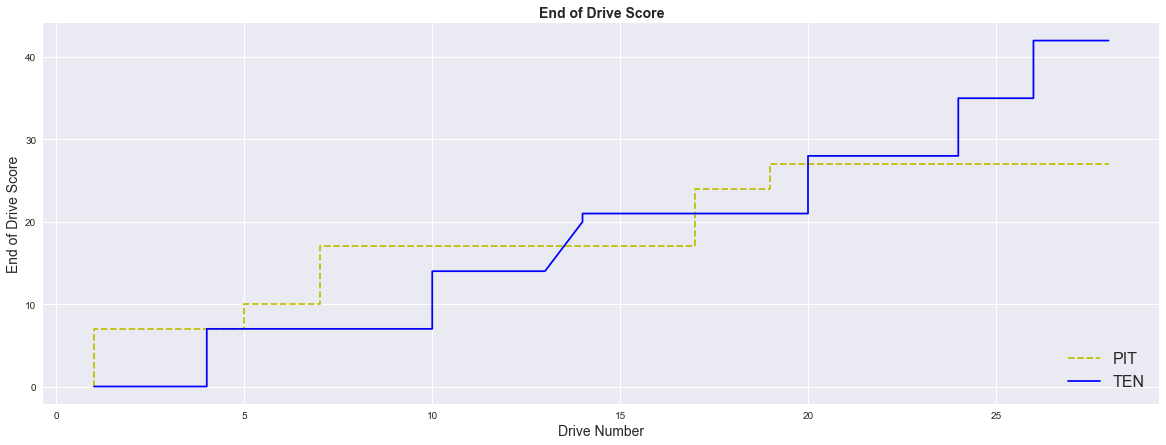

In [22]:
# Reset Fig
plt.close('all')
plt.style.use('seaborn')
fig, ax1 = plt.subplots(figsize=(20,7))
# plt.gca().invert_xaxis()

line1 = ax1.plot(kc_ne_game['drive'],kc_ne_game['total_home_score'],'y--',label='PIT')
line2 = ax1.plot(kc_ne_game['drive'],kc_ne_game['total_away_score'],'b-',label='TEN')

ax1.set_xlabel('Drive Number',fontsize=14)
ax1.set_ylabel('End of Drive Score',fontsize=14)
ax1.set_title("End of Drive Score",fontsize=14,fontweight='bold')

ax1.legend(loc=4,fontsize=16)

plt.show()

<h2>Combining weather data with dataframe data</h2>

In [70]:
import os
import re
def load_weather():

    # mapping out each stadium with their own weather dataframe in a dictionary
       
    weather_path = os.getcwd() + '\\historicalweatherdata'
    files = os.listdir(weather_path)
    df = pd.DataFrame()
    for name in files:
        if '.csv' in name and len(name) <= 7:
            
            df2 = pd.read_csv(weather_path + '\\' + name)
            df = pd.concat([df, df2], sort=True)
    
    df = df.drop(['time_local'], axis=1)
    df['Time (GMT)'] = pd.to_datetime(df['Time (GMT)'])
    df['Time (EST)'] = pd.to_datetime(df['Time (EST)'])
    
    df = df.sort_values(by=['Team Abbreviation', 'Time (EST)'])
    
    return df

In [71]:
weather_df = load_weather()

In [72]:
weather_df.head(10)

,Air Pressure (hPa),City,Dewpoint (°C),Field,Humidity (%),Precipitation (mm),Roof,Team Abbreviation,Temperature (°C),Time (EST),Time (GMT),Wind Direction (deg),Wind Speed (km/h)
0,1014.1,Glendale,0.6,Bermuda grass,67.0,NaN,Retractable,ARI,6.3,2014-12-31 21:00:00,2015-01-01 01:00:00,220.0,16.6
1,1014.8,Glendale,-0.2,Bermuda grass,65.0,NaN,Retractable,ARI,5.9,2014-12-31 22:00:00,2015-01-01 02:00:00,230.0,13.0
2,1014.8,Glendale,-1.0,Bermuda grass,63.0,NaN,Retractable,ARI,5.5,2014-12-31 23:00:00,2015-01-01 03:00:00,240.0,13.0
3,1015.1,Glendale,-1.7,Bermuda grass,59.0,NaN,Retractable,ARI,5.7,2015-01-01 00:00:00,2015-01-01 04:00:00,260.0,9.4
4,1015.5,Glendale,-1.5,Bermuda grass,67.0,NaN,Retractable,ARI,4.1,2015-01-01 01:00:00,2015-01-01 05:00:00,210.0,20.5
5,1015.6,Glendale,-1.8,Bermuda grass,70.0,NaN,Retractable,ARI,3.1,2015-01-01 02:00:00,2015-01-01 06:00:00,190.0,20.5
6,1016.4,Glendale,-1.5,Bermuda grass,78.0,NaN,Retractable,ARI,1.9,2015-01-01 03:00:00,2015-01-01 07:00:00,200.0,16.6
7,1016.7,Glendale,-1.1,Bermuda grass,86.0,NaN,Retractable,ARI,1.0,2015-01-01 04:00:00,2015-01-01 08:00:00,210.0,11.2
8,1017.1,Glendale,-1.5,Bermuda grass,84.0,NaN,Retractable,ARI,0.9,2015-01-01 05:00:00,2015-01-01 09:00:00,190.0,13.0
9,1017.7,Glendale,-2.4,Bermuda grass,78.0,NaN,Retractable,ARI,1.0,2015-01-01 06:00:00,2015-01-01 10:00:00,200.0,7.6


In [73]:
weather_df.dtypes

Air Pressure (hPa)             float64
City                            object
Dewpoint (°C)                  float64
Field                           object
Humidity (%)                   float64
Precipitation (mm)             float64
Roof                            object
Team Abbreviation               object
Temperature (°C)               float64
Time (EST)              datetime64[ns]
Time (GMT)              datetime64[ns]
Wind Direction (deg)           float64
Wind Speed (km/h)              float64
dtype: object

In [74]:
nfl_small2.head()

,index,play_id,game_id,game_date,time,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,game_half,quarter_end,qtr,home_team,away_team,posteam,posteam_type,defteam,side_of_field,yardline_100,drive,sp,down,goal_to_go,yrdln,ydstogo,ydsnet,desc,play_type,yards_gained,pass_length,air_yards,yards_after_catch,field_goal_result,kick_distance,extra_point_result,two_point_conv_result,td_team,total_home_score,total_away_score,posteam_score,defteam_score,sack,touchdown,pass_touchdown,rush_touchdown,return_touchdown,extra_point_attempt,two_point_attempt,field_goal_attempt,fumble,complete_pass,Start_Time,diff,Estimated_Time
0,362094,44,2017090700,2017-09-07,15:00,900.0,1800.0,3600.0,Half1,0,1,NE,KC,NE,home,KC,KC,35.0,1,0,NaN,0.0,KC 35,0,73,C.Santos kicks 64 yards from KC 35 to NE 1. D....,kickoff,0.0,NaN,NaN,NaN,NaN,64.0,NaN,NaN,NaN,0,0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017-09-07 20:30:00,00:00:00,2017-09-07 20:30:00
1,362095,68,2017090700,2017-09-07,14:55,895.0,1795.0,3595.0,Half1,0,1,NE,KC,NE,home,KC,NE,73.0,1,0,1.0,0.0,NE 27,10,0,(14:55) NE 12-Brady 18th season as Patriots QB...,pass,0.0,deep,27.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017-09-07 20:30:00,00:00:15,2017-09-07 20:30:15
2,362096,94,2017090700,2017-09-07,14:49,889.0,1789.0,3589.0,Half1,0,1,NE,KC,NE,home,KC,NE,73.0,1,0,2.0,0.0,NE 27,10,8,(14:49) T.Brady pass short right to R.Burkhead...,pass,8.0,short,1.0,7.0,NaN,NaN,NaN,NaN,NaN,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2017-09-07 20:30:00,00:00:33,2017-09-07 20:30:33
3,362097,118,2017090700,2017-09-07,14:14,854.0,1754.0,3554.0,Half1,0,1,NE,KC,NE,home,KC,NE,65.0,1,0,3.0,0.0,NE 35,2,73,(14:14) (Shotgun) J.White left guard to NE 43 ...,run,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017-09-07 20:30:00,00:02:18,2017-09-07 20:32:18
4,362098,139,2017090700,2017-09-07,13:52,832.0,1732.0,3532.0,Half1,0,1,NE,KC,NE,home,KC,NE,57.0,1,0,1.0,0.0,NE 43,10,19,"(13:52) (No Huddle, Shotgun) J.White up the mi...",run,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017-09-07 20:30:00,00:03:24,2017-09-07 20:33:24


In [88]:
nfl_small2['Estimated_Hour'] = nfl_small2['Estimated_Time'].dt.round('H')
nfl_weather = pd.merge(nfl_small2, weather_df, how = 'left', left_on = ['home_team', 'Estimated_Hour'], right_on = ['Team Abbreviation', 'Time (EST)'])
nfl_weather.sample(10)

,index,play_id,game_id,game_date,time,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,game_half,quarter_end,qtr,home_team,away_team,posteam,posteam_type,defteam,side_of_field,yardline_100,drive,sp,down,goal_to_go,yrdln,ydstogo,ydsnet,desc,play_type,yards_gained,pass_length,air_yards,yards_after_catch,field_goal_result,kick_distance,extra_point_result,two_point_conv_result,td_team,total_home_score,total_away_score,posteam_score,defteam_score,sack,touchdown,pass_touchdown,rush_touchdown,return_touchdown,extra_point_attempt,two_point_attempt,field_goal_attempt,fumble,complete_pass,Start_Time,diff,Estimated_Time,Estimated_Hour,Air Pressure (hPa),City,Dewpoint (°C),Field,Humidity (%),Precipitation (mm),Roof,Team Abbreviation,Temperature (°C),Time (EST),Time (GMT),Wind Direction (deg),Wind Speed (km/h)
35215,396793,836,2017121006,2017-12-10,00:07,7.0,907.0,2707.0,Half1,0,1,KC,OAK,KC,home,OAK,OAK,17.0,4,0,1.0,0.0,OAK 17,10,85,(:07) (Shotgun) A.Smith pass short middle to T...,pass,16.0,short,-2.0,18.0,NaN,NaN,NaN,NaN,NaN,3,0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2017-12-10 13:00:00,00:44:39,2017-12-10 13:44:39,2017-12-10 14:00:00,1020.1,Kansas City,-3.8,Bermuda grass,35.0,0.0,Open,KC,11.1,2017-12-10 14:00:00,2017-12-10 18:00:00,300.0,18.4
71784,432575,3070,2018111106,2018-11-11,13:21:00,801.0,801.0,801.0,Half2,0,4,NYJ,BUF,BUF,away,NYJ,BUF,51.0,18,0,3.0,0.0,BUF 49,1,1,(13:21) M.Barkley sacked at BUF 41 for -8 yard...,pass,-8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,38,38.0,10.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2018-11-11 16:25:00,02:19:57,2018-11-11 18:44:57,2018-11-11 19:00:00,1027.3,East Rutherford,-5.6,UBU Sports Speed Series S5-M Synthetic Turf,41.0,0.0,Open,NYJ,6.7,2018-11-11 19:00:00,2018-11-11 23:00:00,270.0,7.6
61691,423790,1256,2018101412,2018-10-14,09:15:00,555.0,555.0,2355.0,Half1,0,2,NE,KC,KC,away,NE,NE,25.0,8,0,1.0,0.0,NE 25,10,69,(9:15) (Shotgun) S.Ware up the middle to NE 24...,run,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17,6,6.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2018-10-14 16:25:00,01:02:15,2018-10-14 17:27:15,2018-10-14 17:00:00,1017.0,Foxborough,5.0,FieldTurf CORE,66.0,NaN,Open,NE,11.1,2018-10-14 17:00:00,2018-10-14 21:00:00,NaN,0.0
44969,405818,1979,2017123114,2017-12-31,00:32,32.0,32.0,1832.0,Half1,0,2,LA,SF,LA,home,SF,SF,25.0,12,0,1.0,0.0,SF 25,10,44,(:32) (Shotgun) S.Mannion pass incomplete deep...,pass,0.0,deep,16.0,NaN,NaN,NaN,NaN,NaN,NaN,3,20,3.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017-12-31 16:25:00,01:28:24,2017-12-31 17:53:24,2017-12-31 18:00:00,1018.1,Los Angeles,11.6,Grass,72.0,0.0,Open,LA,16.7,2017-12-31 18:00:00,2017-12-31 22:00:00,260.0,16.6
21353,384127,838,2017110500,2017-11-05,02:42,162.0,1062.0,2862.0,Half1,0,1,CAR,ATL,CAR,home,ATL,CAR,74.0,6,0,3.0,0.0,CAR 26,9,11,(2:42) (Shotgun) C.Newton pass short left to D...,pass,10.0,short,9.0,1.0,NaN,NaN,NaN,NaN,NaN,0,10,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2017-11-05 13:00:00,00:36:54,2017-11-05 13:36:54,2017-11-05 14:00:00,1021.2,Charlotte,14.5,Bermuda grass,84.0,0.0,Open,CAR,17.2,2017-11-05 14:00:00,2017-11-05 18:00:00,150.0,5.4
53088,415187,1774,2018092310,2018-09-23,04:00:00,240.0,240.0,2040.0,Half1,0,2,LA,LAC,LAC,away,LA,LA,15.0,9,0,3.0,0.0,LA 15,1,75,(4:00) M.Gordon right tackle to LA 11 for 4 ya...,run,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,6,6.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2018-09-23 16:25:00,01:18:00,2018-09-23 17:43:00,2018-09-23 18:00:00,1010.8,Los Angeles,15.5,Grass,68.0,0.0,Open,LA,21.7,2018-09-23 18:00:00,2018-09-23 22:00:00,250.0,22.3
22783,384881,1781,2017110508,2017-11-05,03:36,216.0,216.0,2016.0,Half1,0,2,SEA,WAS,WAS,away,SEA,SEA,1.0,11,0,1.0,1.0,SEA 1,1,70,(3:36) T.Bergstrom and R.Anderson reported in ...,run,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017-11-05 16:05:00,01:19:12,2017-11-05 17:24:12,2017-11-05 17:00:00,1012.4,Seattle,-0.1,FieldTurf Revolution 360,92.0,1.3,Open,SEA,1.1,2017-11-05 17:00:00,2017-11-0

In [80]:
nfl_weather.dtypes

index                                  int64
play_id                                int64
game_id                                int64
game_date                     datetime64[ns]
time                                  object
quarter_seconds_remaining            float64
half_seconds_remaining               float64
game_seconds_remaining               float64
game_half                             object
quarter_end                            int64
qtr                                    int64
home_team                             object
away_team                             object
posteam                               object
posteam_type                          object
defteam                               object
side_of_field                         object
yardline_100                         float64
drive                                  int64
sp                                     int64
down                                 float64
goal_to_go                           float64
yrdln     

In [77]:
nfl_weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87272 entries, 0 to 87271
Data columns (total 67 columns):
index                        87272 non-null int64
play_id                      87272 non-null int64
game_id                      87272 non-null int64
game_date                    87272 non-null datetime64[ns]
time                         87272 non-null object
quarter_seconds_remaining    87272 non-null float64
half_seconds_remaining       87272 non-null float64
game_seconds_remaining       87272 non-null float64
game_half                    87272 non-null object
quarter_end                  87272 non-null int64
qtr                          87272 non-null int64
home_team                    87272 non-null object
away_team                    87272 non-null object
posteam                      87272 non-null object
posteam_type                 87272 non-null object
defteam                      87272 non-null object
side_of_field                87127 non-null object
yardline_100      

In [87]:
nfl_small2.info(), weather_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87272 entries, 0 to 87271
Data columns (total 54 columns):
index                        87272 non-null int64
play_id                      87272 non-null int64
game_id                      87272 non-null int64
game_date                    87272 non-null datetime64[ns]
time                         87272 non-null object
quarter_seconds_remaining    87272 non-null float64
half_seconds_remaining       87272 non-null float64
game_seconds_remaining       87272 non-null float64
game_half                    87272 non-null object
quarter_end                  87272 non-null int64
qtr                          87272 non-null int64
home_team                    87272 non-null object
away_team                    87272 non-null object
posteam                      87272 non-null object
posteam_type                 87272 non-null object
defteam                      87272 non-null object
side_of_field                87127 non-null object
yardline_100      

(None, None)

In [91]:
with open ('stadium_dict.pkl', 'rb') as handle:
    stadium_dict = pickle.load(handle)

for k, v in stadium_dict.items():
    print(k,v)

ARI ['Bermuda grass', 'Retractable']
ATL ['FieldTurf Revolution 360', 'Retractable']
BAL ['Bermuda grass', 'Open']
BUF ['A-Turf Titan 50', 'Open']
CAR ['Bermuda grass', 'Open']
CHI ['Kentucky bluegrass', 'Open']
CIN ['UBU Speed Series S5-M Synthetic Turf', 'Open']
CLE ['Kentucky bluegrass', 'Open']
DAL ['Hellas Matrix Turf', 'Retractable']
DEN ['Kentucky bluegrass', 'Open']
DET ['FieldTurf Classic HD', 'Fixed']
GB ['Desso GrassMaster', 'Open']
HOU ['Hellas Matrix Turf', 'Retractable']
IND ['Shaw Sports Momentum Pro', 'Retractable']
JAX ['Bermuda grass', 'Open']
KC ['Bermuda grass', 'Open']
LAC ['Grass', 'Open']
LA ['Grass', 'Open']
MIA ['Platinum TE Paspalum', 'Open']
MIN ['UBU Speed Series S5-M Synthetic Turf', 'Fixed']
NE ['FieldTurf CORE', 'Open']
NO ['FieldTurf Revolution 360', 'Fixed']
NYG ['UBU Sports Speed Series S5-M Synthetic Turf', 'Open']
NYJ ['UBU Sports Speed Series S5-M Synthetic Turf', 'Open']
OAK ['Grass', 'Open']
PHI ['Desso GrassMaster', 'Open']
PIT ['Kentucky bluegra

In [93]:
print(nfl_weather['Roof'].info())
nfl_weather['Roof'] = nfl_weather.apply(lambda x: stadium_dict[x['Hmoe']])


SyntaxError: invalid syntax (<ipython-input-93-84e808481fc5>, line 1)

In [94]:
nfl_weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87272 entries, 0 to 87271
Data columns (total 67 columns):
index                        87272 non-null int64
play_id                      87272 non-null int64
game_id                      87272 non-null int64
game_date                    87272 non-null datetime64[ns]
time                         87272 non-null object
quarter_seconds_remaining    87272 non-null float64
half_seconds_remaining       87272 non-null float64
game_seconds_remaining       87272 non-null float64
game_half                    87272 non-null object
quarter_end                  87272 non-null int64
qtr                          87272 non-null int64
home_team                    87272 non-null object
away_team                    87272 non-null object
posteam                      87272 non-null object
posteam_type                 87272 non-null object
defteam                      87272 non-null object
side_of_field                87127 non-null object
yardline_100      

In [100]:
nfl_weather[nfl_weather[['Roof', 'Team Abbreviation']].isnull().any(axis=1)].sample(200)

,index,play_id,game_id,game_date,time,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,game_half,quarter_end,qtr,home_team,away_team,posteam,posteam_type,defteam,side_of_field,yardline_100,drive,sp,down,goal_to_go,yrdln,ydstogo,ydsnet,desc,play_type,yards_gained,pass_length,air_yards,yards_after_catch,field_goal_result,kick_distance,extra_point_result,two_point_conv_result,td_team,total_home_score,total_away_score,posteam_score,defteam_score,sack,touchdown,pass_touchdown,rush_touchdown,return_touchdown,extra_point_attempt,two_point_attempt,field_goal_attempt,fumble,complete_pass,Start_Time,diff,Estimated_Time,Estimated_Hour,Air Pressure (hPa),City,Dewpoint (°C),Field,Humidity (%),Precipitation (mm),Roof,Team Abbreviation,Temperature (°C),Time (EST),Time (GMT),Wind Direction (deg),Wind Speed (km/h)
20858,382956,2161,2017102910,2017-10-29,14:22,862.0,1762.0,1762.0,Half2,0,3,DET,PIT,DET,home,PIT,DET,76.0,14,0,2.0,0.0,DET 24,11,4,"(14:22) (No Huddle, Shotgun) A.Abdullah up the...",run,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,10,12.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017-10-29 20:30:00,01:31:54,2017-10-29 22:01:54,2017-10-29 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN
24026,385953,1963,2017111202,2017-11-12,00:19,19.0,19.0,1819.0,Half1,0,2,DET,CLE,CLE,away,DET,DET,20.0,11,0,NaN,0.0,DET 20,0,73,Timeout #3 by DET at 00:19.,no_play,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,10,10.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017-11-12 13:00:00,01:29:03,2017-11-12 14:29:03,2017-11-12 14:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN
24074,386001,3006,2017111202,2017-11-12,13:33,813.0,813.0,813.0,Half2,0,4,DET,CLE,DET,home,CLE,CLE,48.0,17,0,1.0,0.0,CLE 48,10,61,"(13:33) (No Huddle, Shotgun) M.Stafford sacked...",pass,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23,24,23.0,24.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017-11-12 13:00:00,02:19:21,2017-11-12 15:19:21,2017-11-12 15:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN
31713,394708,460,2017120302,2017-12-03,05:58,358.0,1258.0,3058.0,Half1,0,1,BUF,NE,NE,away,BUF,NE,76.0,2,0,2.0,0.0,NE 24,8,21,(5:58) (Shotgun) T.Brady pass short left to R....,pass,6.0,short,-4.0,10.0,NaN,NaN,NaN,NaN,NaN,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2017-12-03 13:00:00,00:27:06,2017-12-03 13:27:06,2017-12-03 13:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN
37409,400053,2553,2017121700,2017-12-17,10:05,605.0,1505.0,1505.0,Half2,0,3,BUF,MIA,MIA,away,BUF,BUF,42.0,13,0,2.0,0.0,BUF 42,1,24,(10:05) (Shotgun) J.Cutler FUMBLES (Aborted) a...,run,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21,6,6.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2017-12-17 13:00:00,01:44:45,2017-12-17 14:44:45,2017-12-17 15:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN
11727,373645,1351,2017100802,2017-10-08,09:06,546.0,546.0,2346.0,Half1,0,2,DET,CAR,CAR,away,DET,CAR,74.0,8,0,1.0,0.0,CAR 26,10,2,(9:06) (Shotgun) C.Newton pass short left to K...,pass,2.0,short,2.0,0.0,NaN,NaN,NaN,NaN,NaN,10,10,10.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2017-10-08 13:00:00,01:02:42,2017-10-08 14:02:42,2017-10-08 14:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN
28493,390592,2673,2017112300,2017-11-23,08:04,484.0,1384.0,1384.0,Half2,0,3,DET,MIN,DET,home,MIN,MIN,14.0,14,0,2.0,0.0,MIN 14,10,61,(8:04) (Shotgun) M.Stafford pass short right t...,pass,0.0,short,0.0,0.0,NaN,NaN,NaN,NaN,NaN,10,27,10.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2017-11-23 12:30:00,01:50:48,2017-11-23 14:20:48,2017-11-23 14:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN
20798,382896,767,2017102910,2017-10-29,01:05,65.0,965.0,2765.0,Half1,0,1,DET,PIT,DET,home,PIT,DET,75.0,6,0,1.0,0.0,DET 25,10,15,(1:05) M.Stafford pass incomplete deep left to...,pass,0.0,deep,16.0,NaN,NaN,NaN,NaN,NaN,NaN,3,3,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017-10-29 20:30:00,00:41:45,2017-10-29 21:11:45,2017-10-29 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN
53220,4